In [1]:
import networkx as nx
import random
import heapq
import matplotlib.pyplot as plt
import numpy as np
import time
from tqdm import tqdm
import pandas as pd

# import đồ thị email-Eu-core

## Có trọng số 

In [51]:
random.seed(6)
# Initialize a directed graph
G = nx.DiGraph()

# Assuming your data is stored in a file called 'email-Eu-core.txt'
# and the data starts from a specific line after the header.
# Adjust the path to where you have stored your file.
with open('email-Eu-core.txt/email-Eu-core.txt', 'r') as file:
    for line in file:
        # Skip header lines or process them differently if needed
        if line.startswith('#'):
            continue
        
        # Split the line into source and target nodes
        source, target = map(int, line.split())
        # Assign a random probability to each edge
        probability = random.random()  # Generate a random probability between 0 and 1
        # Assign a random weight to each edge (for example, between 1 and 10)
#         weight = random.randint(1, 10)
        weight = random.random()

        G.add_edge(source, target, probability=probability, weight=weight)

print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())



# Optional: Print some edges with their attributes to verify
# for u, v, data in G.edges(data=True):
#     print(f"Edge ({u}, {v}) - Probability: {data['probability']}, Weight: {data['weight']}")


Number of nodes: 1005
Number of edges: 25571


In [52]:

# Lấy các giá trị xác suất từ các cạnh
probabilities = [G[u][v]['probability'] for u, v in G.edges()]
weights = [G[u][v]['weight'] for u, v in G.edges()]
# Tính giá trị trung bình
mean_probability = np.mean(probabilities)
mean_weight = np.mean(weights)


# Tính độ lệch chuẩn
std_deviation = np.std(probabilities)

    
print("Giá trị cạnh trung bình của đồ thị protein579138:", mean_probability)
print("Độ lệch chuẩn của của  đồ thị protein579138:", std_deviation)
print("Trọng số cạnh trung bình của đồ thị là:",mean_weight)




Giá trị cạnh trung bình của đồ thị protein579138: 0.49997592443758215
Độ lệch chuẩn của của  đồ thị protein579138: 0.28853840579632817
Trọng số cạnh trung bình của đồ thị là: 0.5008380616468823


In [2]:
def plot_graph(G):
    pos = nx.spring_layout(G)  # Tạo bố cục cho đồ thị
    edge_labels = nx.get_edge_attributes(G, 'probability')  # Lấy thuộc tính xác suất của các cạnh

    # Vẽ đồ thị
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='red', node_size=500, font_size=8, font_weight='bold')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)  # Hiển thị nhãn của các cạnh

    plt.title('Uncertain Graph Visualization')
    plt.show()
    
def plot_graph_v2(G):
    pos = nx.spring_layout(G)  # Tạo bố cục cho đồ thị

    # Lấy thuộc tính xác suất và trọng số của các cạnh
    edge_probabilities = nx.get_edge_attributes(G, 'probability')
    edge_weights = nx.get_edge_attributes(G, 'weight')

    # Kết hợp xác suất và trọng số vào nhãn cạnh
    edge_labels = {edge: f"{edge_weights[edge]:.2f}, {edge_probabilities[edge]:.2f}" for edge in G.edges()}

    # Vẽ đồ thị
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='red', node_size=200, font_size=8, font_weight='bold')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=7)  # Hiển thị nhãn của các cạnh

    plt.title('Uncertain Weighted Directed Graph Visualization')
    plt.show()
    
def average_edge_probability(G):
    """ Tính xác suất trung bình của các cạnh trong đồ thị G. """
    total_probability = sum(nx.get_edge_attributes(G, 'probability').values())
    num_edges = G.number_of_edges()
    return total_probability / num_edges if num_edges > 0 else 0


def calculate_f_beta(G_S, beta):
    """
    Tính giá trị f_beta cho đồ thị con G_S.
    - G_S: Đồ thị con được kích thích từ tập hợp các đỉnh S.
    - beta: Ngưỡng xác suất β.
    """
    # Tính xác suất trung bình của cạnh trong G_S
    p_GS = average_edge_probability(G_S)
    
    # Số đỉnh và số cạnh của G_S
    num_vertices = G_S.number_of_nodes()
    num_edges = G_S.number_of_edges()
    
    # Tính f_beta dựa trên công thức
    f_beta = (p_GS - beta) * (num_edges / num_vertices if num_vertices > 0 else 0)
    return f_beta

def average_edge_probability_v2(G):
    """Tính xác suất trung bình của các cạnh trong đồ thị G."""
    total_probability = sum(nx.get_edge_attributes(G, 'probability').values())
    num_edges = G.number_of_edges()
    return total_probability / num_edges if num_edges > 0 else 0

def calculate_f_beta_v2(G_S, beta):
    """
    Tính giá trị f_beta cho đồ thị con G_S.
    - G_S: Đồ thị con được kích thích từ tập hợp các đỉnh S.
    - beta: Ngưỡng xác suất β.
    """
    # Tính xác suất trung bình của các cạnh trong G_S
    total_weighted_prob = sum(G_S[u][v]['weight'] * G_S[u][v]['probability'] for u, v in G_S.edges())
    total_weighted = sum(G_S[u][v]['weight'] for u, v in G_S.edges())
    num_edges = G_S.number_of_edges()
    p_GS = total_weighted_prob / num_edges if num_edges > 0 else 0
    aew = total_weighted / num_edges if num_edges > 0 else 0
    # Số đỉnh của G_S
    num_vertices = G_S.number_of_nodes()
    
    # Tính f_beta dựa trên công thức
    f_beta = (p_GS - aew * beta ) * (num_edges / num_vertices if num_vertices > 0 else 0)
    return f_beta

def surplus_degree(G, v, beta):
    """
    Tính Surplus Degree của đỉnh v trong đồ thị G không sử dụng giá trị tuyệt đối.
    
    - G: đồ thị (V, E, p) với xác suất trên mỗi cạnh.
    - v: đỉnh cần tính Surplus Degree.
    - beta: tham số beta trong khoảng (0, 1).
    """
    # Lấy tập các cạnh liên kết với đỉnh v
    edges = G.edges(v, data=True)
    
    # Tính Surplus Degree
    s_deg = sum(edge[2]['probability'] - beta for edge in edges)
    
    return s_deg

def surplus_degree_v2(G, v, beta):
    """
    Tính Surplus Degree của đỉnh v trong đồ thị G có trọng số và xác suất.
    
    - G: đồ thị (V, E, p) với trọng số và xác suất trên mỗi cạnh.
    - v: đỉnh cần tính Surplus Degree.
    - beta: tham số beta trong khoảng (0, 1).
    """
    # Lấy các cạnh đi vào và đi ra từ đỉnh v
    in_edges = G.in_edges(v, data=True)
    out_edges = G.out_edges(v, data=True)
    
    # Tính Surplus Degree
    s_deg_in = sum(edge[2]['weight'] * edge[2]['probability'] - edge[2]['weight'] * beta for edge in in_edges)
    s_deg_out = sum(edge[2]['weight'] * edge[2]['probability'] - edge[2]['weight'] * beta for edge in out_edges)
    
    return s_deg_in + s_deg_out



def initialize_priority_queue(G, beta):
    """ Khởi tạo hàng đợi ưu tiên với bậc dư thừa cho mỗi đỉnh """
    priority_queue = []
    for v in G.nodes():
        sd = surplus_degree_v2(G, v, beta)
        heapq.heappush(priority_queue, (sd, v))
        
    return priority_queue

def calculate_edge_density_v2(G):
    """
    Tính mật độ cạnh kỳ vọng của đồ thị G.
    """
    # Assuming the function `average_edge_probability` is defined elsewhere
    average_edge = average_edge_probability(G)
    num_edges = G.number_of_edges()
    
    num_vertices = G.number_of_nodes()  # Assuming num_vertices should be the number of nodes in G
#     num_possible_edges = num_vertices * (num_vertices - 1) / 2 
    num_possible_edges = num_vertices * (num_vertices - 1)
    return (average_edge * num_edges) / num_possible_edges

def calculate_edge_density(G):
    """ Tính mật độ cạnh kỳ vọng của đồ thị G. τ """
    num_vertices = len(G.nodes())
    num_possible_edges = num_vertices * (num_vertices - 1)
    sum_probabilities = sum(G[u][v]['probability'] for u, v in G.edges())
    print("sum_probabilities",sum_probabilities)
    print("num_possible_edges", num_possible_edges)
    return sum_probabilities / num_possible_edges

def calculate_edge_density_v3(G):
    """Tính mật độ cạnh kỳ vọng của đồ thị G. τ"""
    num_vertices = len(G.nodes())
    num_possible_edges = num_vertices * (num_vertices - 1) if num_vertices > 1 else 1
    sum_weighted_probabilities = sum(G[u][v]['weight'] * G[u][v]['probability'] for u, v in G.edges())
    return sum_weighted_probabilities / num_possible_edges

def expected_density(G):
    if G.number_of_edges() == 0:
        return 0
    probability_sum = sum(G[u][v]['probability'] for u, v in G.edges())
    num_vertices = len(G.nodes())
    return probability_sum /  num_vertices   if num_vertices > 0 else 0

def expected_density_v2(G):
    if G.number_of_edges() == 0:
        return 0
    probability_sum = sum(G[u][v]['probability'] for u, v in G.edges())
    num_vertices = len(G.nodes())
    return probability_sum /  (num_vertices*(num_vertices -1))   if num_vertices > 0 else 0

def greedy_average_surplus_degree(G, beta):
    """ Thuật toán để loại bỏ đỉnh dựa trên bậc dư thừa trung bình """
    H = G.copy()
    priority_queue = initialize_priority_queue(H, beta)
    best_subgraph = H.copy()
    best_f_beta = calculate_f_beta(best_subgraph, beta)

    with tqdm(total=H.number_of_nodes() - 2) as pbar:
        while len(H) > 2:
            _, v = heapq.heappop(priority_queue)  # Loại bỏ đỉnh có bậc dư thừa thấp nhất

            if v in H:
                H.remove_node(v)
                pbar.update(1)  # Cập nhật tiến trình
                
                # Cập nhật lại hàng đợi ưu tiên
                priority_queue = []  # Tạo lại hàng đợi mới vì bậc dư thừa đã thay đổi
                for u in H.nodes():
                    sd = surplus_degree_v2(H, u, beta)
                    heapq.heappush(priority_queue, (sd, u))
                    
                current_f_beta = calculate_f_beta(H, beta)
                if current_f_beta > best_f_beta:
                    best_subgraph = H.copy()
                    best_f_beta = current_f_beta

    return best_subgraph


Đoạn code trên định nghĩa hàm `surplus_degree` để tính "Surplus Degree" của một đỉnh \( v \) trong đồ thị \( G \). Dưới đây là giải thích chi tiết về từng phần của đoạn code:

### Định nghĩa hàm và chú thích

```python
def surplus_degree(G, v, beta):
    """
    Tính Surplus Degree của đỉnh v trong đồ thị G không sử dụng giá trị tuyệt đối.
    
    - G: đồ thị (V, E, p) với xác suất trên mỗi cạnh.
    - v: đỉnh cần tính Surplus Degree.
    - beta: tham số beta trong khoảng (0, 1).
    """
```

- Hàm `surplus_degree` nhận vào ba tham số:
  - `G`: Đồ thị được biểu diễn dưới dạng một đối tượng (thường là một đối tượng của thư viện NetworkX hoặc tương tự), với các cạnh có gắn trọng số hoặc xác suất.
  - `v`: Đỉnh trong đồ thị \( G \) mà chúng ta cần tính "Surplus Degree".
  - `beta`: Một tham số trong khoảng \( (0, 1) \) được sử dụng để tính toán.

- Chú thích (docstring) mô tả ý nghĩa của hàm và các tham số đầu vào.

### Lấy tập các cạnh liên kết với đỉnh \( v \)

```python
    # Lấy tập các cạnh liên kết với đỉnh v
    edges = G.edges(v, data=True)
```

- `G.edges(v, data=True)` trả về một danh sách các cạnh liên kết với đỉnh \( v \), mỗi cạnh được biểu diễn dưới dạng một tuple \( (u, v, d) \), trong đó \( u \) và \( v \) là hai đỉnh của cạnh và \( d \) là một dictionary chứa dữ liệu liên quan đến cạnh, bao gồm trọng số hoặc xác suất của cạnh đó.

### Tính Surplus Degree

```python
    # Tính Surplus Degree
    s_deg = sum(edge[2]['weight'] - beta for edge in edges)
    
    return s_deg
```

- `s_deg` được tính bằng cách sử dụng biểu thức `sum(edge[2]['weight'] - beta for edge in edges)`, trong đó:
  - `edge[2]['weight']` lấy giá trị trọng số hoặc xác suất của cạnh từ dictionary \( d \).
  - `beta` là tham số đầu vào.
  - Biểu thức này tính hiệu số giữa trọng số của từng cạnh và giá trị \( beta \), sau đó cộng tất cả các hiệu số này lại để được "Surplus Degree" của đỉnh \( v \).

- Kết quả cuối cùng là giá trị `s_deg` được trả về từ hàm.

### Tóm lại

Hàm `surplus_degree` tính "Surplus Degree" của một đỉnh trong đồ thị bằng cách lấy tổng các hiệu số giữa trọng số của mỗi cạnh liên kết với đỉnh đó và một tham số \( beta \). Hàm này không sử dụng giá trị tuyệt đối trong quá trình tính toán.

## Khi beta bằng 0.1

In [55]:
beta = 0.1

ObsEmailEuCore01 = greedy_average_surplus_degree(G,beta)


# Lấy các giá trị xác suất từ các cạnh
probabilities = [ObsEmailEuCore01[u][v]['probability'] for u, v in ObsEmailEuCore01.edges()]
weights = [ObsEmailEuCore01[u][v]['weight'] for u, v in ObsEmailEuCore01.edges()]

# Tính giá trị trung bình
mean_probability = np.mean(probabilities)
mean_weight = np.mean(weights)

# Tính độ lệch chuẩn
std_deviation = np.std(probabilities)
print("Mật độ kì vọng của đồ thị con do thuật toán obs sinh ra là:", expected_density(ObsEmailEuCore01))
print("Số đỉnh trong đồ thị con của thuật toán obs  là:", ObsEmailEuCore01.number_of_nodes())
print("Số cạnh trong đồ thị con của thuật toán obs  là:", ObsEmailEuCore01.number_of_edges())
print("Mật độ kì cạnh vọng của thuật toán obs  là:",calculate_edge_density(ObsEmailEuCore01))
print("Xác xuất cạnh trung bình của thuật toán obs là:",average_edge_probability(ObsEmailEuCore01))
print(" trọng số cạnh trung bình của thuật toán obs là:",mean_weight)
print("Độ lệch chuẩn của thuật toán obs:", std_deviation)

100%|██████████████████████████████████████████████████████████████████████████████| 1003/1003 [00:46<00:00, 21.40it/s]

Mật độ kì vọng của đồ thị con do thuật toán obs sinh ra là: 22.90862654359603
Số đỉnh trong đồ thị con của thuật toán obs  là: 208
Số cạnh trong đồ thị con của thuật toán obs  là: 9414
sum_probabilities 4764.994321067974
num_possible_edges 43056
Mật độ kì cạnh vọng của thuật toán obs  là: 0.11066969344732382
Xác xuất cạnh trung bình của thuật toán obs là: 0.5061604335105134
 trọng số cạnh trung bình của thuật toán obs là: 0.4975614166564639
Độ lệch chuẩn của thuật toán obs: 0.2894176798873584


## Khi beta = 0.2

In [56]:
beta = 0.2

ObsEmailEuCore02 = greedy_average_surplus_degree(G,beta)
# Lấy các giá trị xác suất từ các cạnh
probabilities = [ObsEmailEuCore02[u][v]['probability'] for u, v in ObsEmailEuCore02.edges()]
weights = [ObsEmailEuCore02[u][v]['weight'] for u, v in ObsEmailEuCore02.edges()]

# Tính giá trị trung bình
mean_probability = np.mean(probabilities)
mean_weight = np.mean(weights)

# Tính độ lệch chuẩn
std_deviation = np.std(probabilities)
print("Mật độ kì vọng của đồ thị con do thuật toán obs sinh ra là:", expected_density(ObsEmailEuCore02))
print("Số đỉnh trong đồ thị con của thuật toán obs  là:", ObsEmailEuCore02.number_of_nodes())
print("Số cạnh trong đồ thị con của thuật toán obs  là:", ObsEmailEuCore02.number_of_edges())
print("Mật độ kì cạnh vọng của thuật toán obs  là:",calculate_edge_density(ObsEmailEuCore02))
print("Xác xuất cạnh trung bình của thuật toán obs là:",average_edge_probability(ObsEmailEuCore02))
print(" trọng số cạnh trung bình của thuật toán obs là:",mean_weight)
print("Độ lệch chuẩn của thuật toán obs:", std_deviation)


100%|██████████████████████████████████████████████████████████████████████████████| 1003/1003 [00:50<00:00, 19.95it/s]

Mật độ kì vọng của đồ thị con do thuật toán obs sinh ra là: 22.71101160946838
Số đỉnh trong đồ thị con của thuật toán obs  là: 241
Số cạnh trong đồ thị con của thuật toán obs  là: 10777
sum_probabilities 5473.3537978818795
num_possible_edges 57840
Mật độ kì cạnh vọng của thuật toán obs  là: 0.09462921503945158
Xác xuất cạnh trung bình của thuật toán obs là: 0.5078736009911737
 trọng số cạnh trung bình của thuật toán obs là: 0.49754322643830834
Độ lệch chuẩn của thuật toán obs: 0.2891025317862779


## Khi beta = 0.4

In [57]:
beta = 0.4

ObsEmailEuCore04 = greedy_average_surplus_degree(G,beta)
# Lấy các giá trị xác suất từ các cạnh
probabilities = [ObsEmailEuCore04[u][v]['probability'] for u, v in ObsEmailEuCore04.edges()]
weights = [ObsEmailEuCore04[u][v]['weight'] for u, v in ObsEmailEuCore04.edges()]

# Tính giá trị trung bình
mean_probability = np.mean(probabilities)
mean_weight = np.mean(weights)

# Tính độ lệch chuẩn
std_deviation = np.std(probabilities)
print("Mật độ kì vọng của đồ thị con do thuật toán obs sinh ra là:", expected_density(ObsEmailEuCore04))
print("Số đỉnh trong đồ thị con của thuật toán obs  là:", ObsEmailEuCore04.number_of_nodes())
print("Số cạnh trong đồ thị con của thuật toán obs  là:", ObsEmailEuCore04.number_of_edges())
print("Mật độ kì cạnh vọng của thuật toán obs  là:",calculate_edge_density(ObsEmailEuCore04))
print("Xác xuất cạnh trung bình của thuật toán obs là:",average_edge_probability(ObsEmailEuCore04))
print(" trọng số cạnh trung bình của thuật toán obs là:",mean_weight)
print("Độ lệch chuẩn của thuật toán obs:", std_deviation)


100%|██████████████████████████████████████████████████████████████████████████████| 1003/1003 [00:44<00:00, 22.51it/s]

Mật độ kì vọng của đồ thị con do thuật toán obs sinh ra là: 20.27807027087872
Số đỉnh trong đồ thị con của thuật toán obs  là: 208
Số cạnh trong đồ thị con của thuật toán obs  là: 8132
sum_probabilities 4217.838616342774
num_possible_edges 43056
Mật độ kì cạnh vọng của thuật toán obs  là: 0.0979616921298489
Xác xuất cạnh trung bình của thuật toán obs là: 0.5186717432787474
 trọng số cạnh trung bình của thuật toán obs là: 0.4972681287356021
Độ lệch chuẩn của thuật toán obs: 0.2884039784704802


## Khi beta = 0.6

In [59]:
beta = 0.6

ObsEmailEuCore06 = greedy_average_surplus_degree(G,beta)
# Lấy các giá trị xác suất từ các cạnh
probabilities = [ObsEmailEuCore06[u][v]['probability'] for u, v in ObsEmailEuCore06.edges()]
weights = [ObsEmailEuCore06[u][v]['weight'] for u, v in ObsEmailEuCore06.edges()]

# Tính giá trị trung bình
mean_probability = np.mean(probabilities)
mean_weight = np.mean(weights)

# Tính độ lệch chuẩn
std_deviation = np.std(probabilities)
print("Mật độ kì vọng của đồ thị con do thuật toán obs sinh ra là:", expected_density(ObsEmailEuCore06))
print("Số đỉnh trong đồ thị con của thuật toán obs  là:", ObsEmailEuCore06.number_of_nodes())
print("Số cạnh trong đồ thị con của thuật toán obs  là:", ObsEmailEuCore06.number_of_edges())
print("Mật độ kì cạnh vọng của thuật toán obs  là:",calculate_edge_density(ObsEmailEuCore06))
print("Xác xuất cạnh trung bình của thuật toán obs là:",average_edge_probability(ObsEmailEuCore06))
print(" trọng số cạnh trung bình của thuật toán obs là:",mean_weight)
print("Độ lệch chuẩn của thuật toán obs:", std_deviation)


100%|██████████████████████████████████████████████████████████████████████████████| 1003/1003 [00:15<00:00, 65.35it/s]

Mật độ kì vọng của đồ thị con do thuật toán obs sinh ra là: 1.9049168583441378
Số đỉnh trong đồ thị con của thuật toán obs  là: 3
Số cạnh trong đồ thị con của thuật toán obs  là: 7
sum_probabilities 5.714750575032413
num_possible_edges 6
Mật độ kì cạnh vọng của thuật toán obs  là: 0.9524584291720689
Xác xuất cạnh trung bình của thuật toán obs là: 0.8163929392903447
 trọng số cạnh trung bình của thuật toán obs là: 0.3079224926477605
Độ lệch chuẩn của thuật toán obs: 0.15454183630139573


In [25]:
# Lưu đồ thị
nx.write_gexf(ObsEmailEuCore06, "ObsEmailEuCore06.gexf")


## Khi beta = 0.8

In [60]:
beta = 0.8

ObsEmailEuCore08 = greedy_average_surplus_degree(G,beta)
# Lấy các giá trị xác suất từ các cạnh
probabilities = [ObsEmailEuCore08[u][v]['probability'] for u, v in ObsEmailEuCore08.edges()]
weights = [ObsEmailEuCore08[u][v]['weight'] for u, v in ObsEmailEuCore08.edges()]

# Tính giá trị trung bình
mean_probability = np.mean(probabilities)
mean_weight = np.mean(weights)

# Tính độ lệch chuẩn
std_deviation = np.std(probabilities)
print("Mật độ kì vọng của đồ thị con do thuật toán obs sinh ra là:", expected_density(ObsEmailEuCore08))
print("Số đỉnh trong đồ thị con của thuật toán obs  là:", ObsEmailEuCore08.number_of_nodes())
print("Số cạnh trong đồ thị con của thuật toán obs  là:", ObsEmailEuCore08.number_of_edges())
print("Mật độ kì cạnh vọng của thuật toán obs  là:",calculate_edge_density(ObsEmailEuCore08))
print("Xác xuất cạnh trung bình của thuật toán obs là:",average_edge_probability(ObsEmailEuCore08))
print(" trọng số cạnh trung bình của thuật toán obs là:",mean_weight)
print("Độ lệch chuẩn của thuật toán obs:", std_deviation)


100%|██████████████████████████████████████████████████████████████████████████████| 1003/1003 [00:13<00:00, 76.22it/s]

Mật độ kì vọng của đồ thị con do thuật toán obs sinh ra là: 1.2044068968402208
Số đỉnh trong đồ thị con của thuật toán obs  là: 4
Số cạnh trong đồ thị con của thuật toán obs  là: 5
sum_probabilities 4.817627587360883
num_possible_edges 12
Mật độ kì cạnh vọng của thuật toán obs  là: 0.40146896561340695
Xác xuất cạnh trung bình của thuật toán obs là: 0.9635255174721766
 trọng số cạnh trung bình của thuật toán obs là: 0.4395060410096788
Độ lệch chuẩn của thuật toán obs: 0.04959977923460279


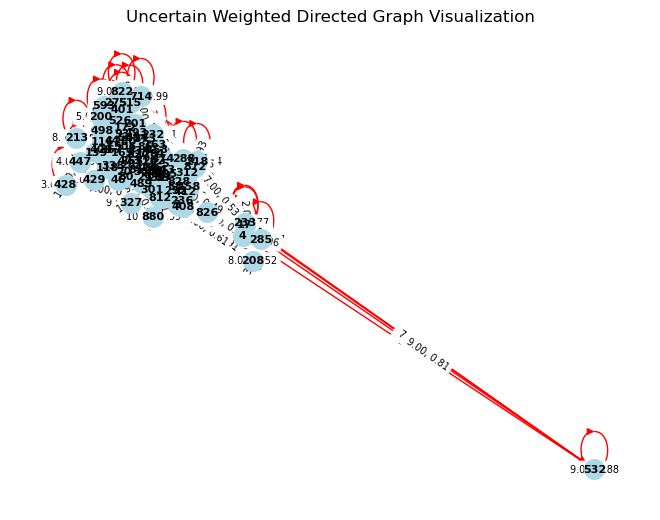

In [63]:
plot_graph_v2(obs_06)

# Đối với đồ thị protein 1736402.protein.links



In [6]:
random.seed(9)

# Đọc dữ liệu từ tệp TXT
file_path = '1736402.protein.links.v12.0.txt'
data = pd.read_csv(file_path, sep=' ')

# Khởi tạo đồ thị có hướng
G = nx.DiGraph()

# Thêm các cạnh với trọng số và xác suất
for _, row in data.iterrows():
    protein1 = row['protein1']
    protein2 = row['protein2']
    combined_score = row['combined_score']
    
    # Giả sử xác suất được tính dựa trên combined_score
    probability = combined_score / 1000.0  # Điều chỉnh hệ số nếu cần thiết

     # Định hướng cạnh dựa trên một quy tắc ngẫu nhiên
    if random.choice([True, False]):
        G.add_edge(protein1, protein2, probability= probability, weight=random.random())
#     else:
#         G.add_edge(protein2, protein1, probability= probability, weight=random.randint(1, 10))

# # Hàm vẽ đồ thị
# def plot_graph(G):
#     pos = nx.spring_layout(G)  # Tạo bố cục cho đồ thị

#     # Lấy thuộc tính xác suất và trọng số của các cạnh
#     edge_probabilities = nx.get_edge_attributes(G, 'probability')
#     edge_weights = nx.get_edge_attributes(G, 'weight')

#     # Kết hợp xác suất và trọng số vào nhãn cạnh
#     edge_labels = {edge: f"{edge_weights[edge]:.2f}, {edge_probabilities[edge]:.2f}" for edge in G.edges()}

#     # Vẽ đồ thị
#     nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='red', node_size=500, font_size=8, font_weight='bold')
#     nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=7)  # Hiển thị nhãn của các cạnh

#     plt.title('Uncertain Weighted Directed Graph Visualization')
#     plt.show()

# # Gọi hàm để vẽ đồ thị
# plot_graph(G)

# # In các cạnh của đồ thị có hướng
# print("Edges in directed graph:")
# for edge in G.edges(data=True):
#     print(edge)
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())



# Lấy các giá trị xác suất từ các cạnh
probabilities = [G[u][v]['probability'] for u, v in G.edges()]
weights = [G[u][v]['weight'] for u, v in G.edges()]
# Tính giá trị trung bình
mean_probability = np.mean(probabilities)
mean_weight = np.mean(weights)


# Tính độ lệch chuẩn
std_deviation = np.std(probabilities)
do_lech_chuan_trong_so = np.std(weights)

    
print("Giá trị cạnh trung bình của đồ thị protein579138:", mean_probability)
print("Độ lệch chuẩn của của  đồ thị protein579138:", std_deviation)
print("Độ lệch chuẩn trọng số của đồ thị con được tạo ra bởi thuật toán uds là:", do_lech_chuan_trong_so)
print("Trọng số cạnh trung bình của đồ thị là:",mean_weight)
print("Mật độ kì cạnh vọng là:",calculate_edge_density(G))




Number of nodes: 3082
Number of edges: 315247
Giá trị cạnh trung bình của đồ thị protein579138: 0.2812061907012597
Độ lệch chuẩn của của  đồ thị protein579138: 0.18194945319649977
Độ lệch chuẩn trọng số của đồ thị con được tạo ra bởi thuật toán uds là: 0.28855910003547514
Trọng số cạnh trung bình của đồ thị là: 0.49985353210339717
sum_probabilities 88649.40799999081
num_possible_edges 9495642
Mật độ kì cạnh vọng là: 0.009335799306670452


In [4]:
beta = 0.6

Obs1736402Protein06 = greedy_average_surplus_degree(G,beta)
# Lấy các giá trị xác suất từ các cạnh
probabilities = [Obs511145Protein06[u][v]['probability'] for u, v in Obs511145Protein06.edges()]
weights = [Obs511145Protein06[u][v]['weight'] for u, v in Obs511145Protein06.edges()]

# Tính giá trị trung bình
mean_probability = np.mean(probabilities)
mean_weight = np.mean(weights)

# Tính độ lệch chuẩn
std_deviation = np.std(probabilities)
print("Mật độ kì vọng của đồ thị con do thuật toán obs sinh ra là:", expected_density(Obs511145Protein06))
print("Số đỉnh trong đồ thị con của thuật toán obs  là:", Obs511145Protein06.number_of_nodes())
print("Số cạnh trong đồ thị con của thuật toán obs  là:", Obs511145Protein06.number_of_edges())
print("Mật độ kì cạnh vọng của thuật toán obs  là:",calculate_edge_density(Obs511145Protein06))
print("Xác xuất cạnh trung bình của thuật toán obs là:",average_edge_probability(Obs511145Protein06))
print(" trọng số cạnh trung bình của thuật toán obs là:",mean_weight)
print("Độ lệch chuẩn của thuật toán obs:", std_deviation)


100%|██████████████████████████████████████████████████████████████████████████████| 3080/3080 [19:29<00:00,  2.63it/s]

Mật độ kì vọng của đồ thị con do thuật toán obs sinh ra là: 34.51690410958899
Số đỉnh trong đồ thị con của thuật toán obs  là: 73
Số cạnh trong đồ thị con của thuật toán obs  là: 2681
sum_probabilities 2519.7339999999963
num_possible_edges 5256
Mật độ kì cạnh vọng của thuật toán obs  là: 0.47940144596651374
Xác xuất cạnh trung bình của thuật toán obs là: 0.939848563968667
 trọng số cạnh trung bình của thuật toán obs là: 0.502609410483513
Độ lệch chuẩn của thuật toán obs: 0.11398164735264689


In [5]:
beta = 0.1

Obs579138Protein01 = greedy_average_surplus_degree(G,beta)
# Lấy các giá trị xác suất từ các cạnh
probabilities = [Obs579138Protein01[u][v]['probability'] for u, v in Obs579138Protein01.edges()]
weights = [Obs579138Protein01[u][v]['weight'] for u, v in Obs579138Protein01.edges()]

# Tính giá trị trung bình
mean_probability = np.mean(probabilities)
mean_weight = np.mean(weights)

# Tính độ lệch chuẩn
std_deviation = np.std(probabilities)
print("Mật độ kì vọng của đồ thị con do thuật toán obs sinh ra là:", expected_density(Obs579138Protein01))
print("Số đỉnh trong đồ thị con của thuật toán obs  là:", Obs579138Protein01.number_of_nodes())
print("Số cạnh trong đồ thị con của thuật toán obs  là:", Obs579138Protein01.number_of_edges())
print("Mật độ kì cạnh vọng của thuật toán obs  là:",calculate_edge_density(Obs579138Protein01))
print("Xác xuất cạnh trung bình của thuật toán obs là:",average_edge_probability(Obs579138Protein01))
print(" trọng số cạnh trung bình của thuật toán obs là:",mean_weight)
print("Độ lệch chuẩn của thuật toán obs:", std_deviation)

beta = 0.2

Obs579138Protein02 = greedy_average_surplus_degree(G,beta)
# Lấy các giá trị xác suất từ các cạnh
probabilities = [Obs579138Protein02[u][v]['probability'] for u, v in Obs579138Protein02.edges()]
weights = [Obs579138Protein02[u][v]['weight'] for u, v in Obs579138Protein02.edges()]

# Tính giá trị trung bình
mean_probability = np.mean(probabilities)
mean_weight = np.mean(weights)

# Tính độ lệch chuẩn
std_deviation = np.std(probabilities)
print("Mật độ kì vọng của đồ thị con do thuật toán obs sinh ra là:", expected_density(Obs579138Protein02))
print("Số đỉnh trong đồ thị con của thuật toán obs  là:", Obs579138Protein02.number_of_nodes())
print("Số cạnh trong đồ thị con của thuật toán obs  là:", Obs579138Protein02.number_of_edges())
print("Mật độ kì cạnh vọng của thuật toán obs  là:",calculate_edge_density(Obs579138Protein02))
print("Xác xuất cạnh trung bình của thuật toán obs là:",average_edge_probability(Obs579138Protein02))
print(" trọng số cạnh trung bình của thuật toán obs là:",mean_weight)
print("Độ lệch chuẩn của thuật toán obs:", std_deviation)

beta = 0.4

Obs579138Protein04 = greedy_average_surplus_degree(G,beta)
# Lấy các giá trị xác suất từ các cạnh
probabilities = [Obs579138Protein04[u][v]['probability'] for u, v in Obs579138Protein04.edges()]
weights = [Obs579138Protein04[u][v]['weight'] for u, v in Obs579138Protein04.edges()]

# Tính giá trị trung bình
mean_probability = np.mean(probabilities)
mean_weight = np.mean(weights)

# Tính độ lệch chuẩn
std_deviation = np.std(probabilities)
print("Mật độ kì vọng của đồ thị con do thuật toán obs sinh ra là:", expected_density(Obs579138Protein04))
print("Số đỉnh trong đồ thị con của thuật toán obs  là:", Obs579138Protein04.number_of_nodes())
print("Số cạnh trong đồ thị con của thuật toán obs  là:", Obs579138Protein04.number_of_edges())
print("Mật độ kì cạnh vọng của thuật toán obs  là:",calculate_edge_density(Obs579138Protein04))
print("Xác xuất cạnh trung bình của thuật toán obs là:",average_edge_probability(Obs579138Protein04))
print(" trọng số cạnh trung bình của thuật toán obs là:",mean_weight)
print("Độ lệch chuẩn của thuật toán obs:", std_deviation)

beta = 0.8

Obs579138Protein08 = greedy_average_surplus_degree(G,beta)
# Lấy các giá trị xác suất từ các cạnh
probabilities = [Obs579138Protein08[u][v]['probability'] for u, v in Obs579138Protein08.edges()]
weights = [Obs579138Protein08[u][v]['weight'] for u, v in Obs579138Protein08.edges()]

# Tính giá trị trung bình
mean_probability = np.mean(probabilities)
mean_weight = np.mean(weights)

# Tính độ lệch chuẩn
std_deviation = np.std(probabilities)
print("Mật độ kì vọng của đồ thị con do thuật toán obs sinh ra là:", expected_density(Obs579138Protein08))
print("Số đỉnh trong đồ thị con của thuật toán obs  là:", Obs579138Protein08.number_of_nodes())
print("Số cạnh trong đồ thị con của thuật toán obs  là:", Obs579138Protein08.number_of_edges())
print("Mật độ kì cạnh vọng của thuật toán obs  là:",calculate_edge_density(Obs579138Protein08))
print("Xác xuất cạnh trung bình của thuật toán obs là:",average_edge_probability(Obs579138Protein08))
print(" trọng số cạnh trung bình của thuật toán obs là:",mean_weight)
print("Độ lệch chuẩn của thuật toán obs:", std_deviation)


100%|██████████████████████████████████████████████████████████████████████████████| 3080/3080 [42:47<00:00,  1.20it/s]


Mật độ kì vọng của đồ thị con do thuật toán obs sinh ra là: 43.83819298245554
Số đỉnh trong đồ thị con của thuật toán obs  là: 171
Số cạnh trong đồ thị con của thuật toán obs  là: 11209
sum_probabilities 7496.330999999897
num_possible_edges 29070
Mật độ kì cạnh vọng của thuật toán obs  là: 0.25787172342620907
Xác xuất cạnh trung bình của thuật toán obs là: 0.6687778570791236
 trọng số cạnh trung bình của thuật toán obs là: 0.5020675118779826
Độ lệch chuẩn của thuật toán obs: 0.2790844962071648


100%|██████████████████████████████████████████████████████████████████████████████| 3080/3080 [36:30<00:00,  1.41it/s]


Mật độ kì vọng của đồ thị con do thuật toán obs sinh ra là: 42.34255639097687
Số đỉnh trong đồ thị con của thuật toán obs  là: 133
Số cạnh trong đồ thị con của thuật toán obs  là: 7463
sum_probabilities 5631.559999999923
num_possible_edges 17556
Mật độ kì cạnh vọng của thuật toán obs  là: 0.32077694235588533
Xác xuất cạnh trung bình của thuật toán obs là: 0.7545973469114194
 trọng số cạnh trung bình của thuật toán obs là: 0.502126690862431
Độ lệch chuẩn của thuật toán obs: 0.2584488752561979


100%|██████████████████████████████████████████████████████████████████████████████| 3080/3080 [15:54<00:00,  3.23it/s]


Mật độ kì vọng của đồ thị con do thuật toán obs sinh ra là: 39.186086021505155
Số đỉnh trong đồ thị con của thuật toán obs  là: 93
Số cạnh trong đồ thị con của thuật toán obs  là: 4173
sum_probabilities 3644.3059999999796
num_possible_edges 8556
Mật độ kì cạnh vọng của thuật toán obs  là: 0.42593571762505605
Xác xuất cạnh trung bình của thuật toán obs là: 0.8733060148574119
 trọng số cạnh trung bình của thuật toán obs là: 0.49901753634476625
Độ lệch chuẩn của thuật toán obs: 0.19166019423678743


100%|██████████████████████████████████████████████████████████████████████████████| 3080/3080 [12:06<00:00,  4.24it/s]

Mật độ kì vọng của đồ thị con do thuật toán obs sinh ra là: 27.62776785714302
Số đỉnh trong đồ thị con của thuật toán obs  là: 56
Số cạnh trong đồ thị con của thuật toán obs  là: 1576
sum_probabilities 1547.155000000009
num_possible_edges 3080
Mật độ kì cạnh vọng của thuật toán obs  là: 0.5023230519480549
Xác xuất cạnh trung bình của thuật toán obs là: 0.9816973350253865
 trọng số cạnh trung bình của thuật toán obs là: 0.5041704222171315
Độ lệch chuẩn của thuật toán obs: 0.043811567475662866


# 300267.protein

In [ ]:
random.seed(9)
# Đọc dữ liệu từ tệp TXT
file_path = '300267.protein.links.v12.0.txt'
data = pd.read_csv(file_path, sep=' ')

# Khởi tạo đồ thị có hướng
G = nx.DiGraph()

# Thêm các cạnh với trọng số và xác suất
for _, row in data.iterrows():
    protein1 = row['protein1']
    protein2 = row['protein2']
    combined_score = row['combined_score']
    
    # Giả sử xác suất được tính dựa trên combined_score
    probability = combined_score / 1000.0  # Điều chỉnh hệ số nếu cần thiết

     # Định hướng cạnh dựa trên một quy tắc ngẫu nhiên
        
    if random.choice([True, False]):
        G.add_edge(protein1, protein2, probability= probability, weight= random.random())
#     else:
#         G.add_edge(protein2, protein1, probability= probability, weight= random.random())

# # Hàm vẽ đồ thị
# def plot_graph(G):
#     pos = nx.spring_layout(G)  # Tạo bố cục cho đồ thị

#     # Lấy thuộc tính xác suất và trọng số của các cạnh
#     edge_probabilities = nx.get_edge_attributes(G, 'probability')
#     edge_weights = nx.get_edge_attributes(G, 'weight')

#     # Kết hợp xác suất và trọng số vào nhãn cạnh
#     edge_labels = {edge: f"{edge_weights[edge]:.2f}, {edge_probabilities[edge]:.2f}" for edge in G.edges()}

#     # Vẽ đồ thị
#     nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='red', node_size=500, font_size=8, font_weight='bold')
#     nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=7)  # Hiển thị nhãn của các cạnh

#     plt.title('Uncertain Weighted Directed Graph Visualization')
#     plt.show()

# # Gọi hàm để vẽ đồ thị
# plot_graph(G)

# # In các cạnh của đồ thị có hướng
# print("Edges in directed graph:")
# for edge in G.edges(data=True):
#     print(edge)
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())


# Lấy các giá trị xác suất từ các cạnh
probabilities = [G[u][v]['probability'] for u, v in G.edges()]
weights = [G[u][v]['weight'] for u, v in G.edges()]
# Tính giá trị trung bình
mean_probability = np.mean(probabilities)
mean_weight = np.mean(weights)
do_lech_chuan_trong_so = np.std(weights)


# Tính độ lệch chuẩn
std_deviation = np.std(probabilities)

    
print("Giá trị cạnh trung bình của đồ thị protein579138:", mean_probability)
print("Độ lệch chuẩn của của  đồ thị protein579138:", std_deviation)
print("Độ lệch chuẩn trọng số của của  đồ thị protein579138:", do_lech_chuan_trong_so)
print("Trọng số cạnh trung bình của đồ thị là:",mean_weight)
print("Mật độ cạnh kì vọng ban đầu của đồ thị:", calculate_edge_density(G))

In [9]:
beta = 0.6

Obs511145Protein06 = greedy_average_surplus_degree(G,beta)
# Lấy các giá trị xác suất từ các cạnh
probabilities = [Obs511145Protein06[u][v]['probability'] for u, v in Obs511145Protein06.edges()]
weights = [Obs511145Protein06[u][v]['weight'] for u, v in Obs511145Protein06.edges()]

# Tính giá trị trung bình
mean_probability = np.mean(probabilities)
mean_weight = np.mean(weights)

# Tính độ lệch chuẩn
std_deviation = np.std(probabilities)
print("Mật độ kì vọng của đồ thị con do thuật toán obs sinh ra là:", expected_density(Obs511145Protein06))
print("Số đỉnh trong đồ thị con của thuật toán obs  là:", Obs511145Protein06.number_of_nodes())
print("Số cạnh trong đồ thị con của thuật toán obs  là:", Obs511145Protein06.number_of_edges())
print("Mật độ kì cạnh vọng của thuật toán obs  là:",calculate_edge_density(Obs511145Protein06))
print("Xác xuất cạnh trung bình của thuật toán obs là:",average_edge_probability(Obs511145Protein06))
print(" trọng số cạnh trung bình của thuật toán obs là:",mean_weight)
print("Độ lệch chuẩn của thuật toán obs:", std_deviation)

beta = 0.1

Obs579138Protein01 = greedy_average_surplus_degree(G,beta)
# Lấy các giá trị xác suất từ các cạnh
probabilities = [Obs579138Protein01[u][v]['probability'] for u, v in Obs579138Protein01.edges()]
weights = [Obs579138Protein01[u][v]['weight'] for u, v in Obs579138Protein01.edges()]

# Tính giá trị trung bình
mean_probability = np.mean(probabilities)
mean_weight = np.mean(weights)

# Tính độ lệch chuẩn
std_deviation = np.std(probabilities)
print("Mật độ kì vọng của đồ thị con do thuật toán obs sinh ra là:", expected_density(Obs579138Protein01))
print("Số đỉnh trong đồ thị con của thuật toán obs  là:", Obs579138Protein01.number_of_nodes())
print("Số cạnh trong đồ thị con của thuật toán obs  là:", Obs579138Protein01.number_of_edges())
print("Mật độ kì cạnh vọng của thuật toán obs  là:",calculate_edge_density(Obs579138Protein01))
print("Xác xuất cạnh trung bình của thuật toán obs là:",average_edge_probability(Obs579138Protein01))
print(" trọng số cạnh trung bình của thuật toán obs là:",mean_weight)
print("Độ lệch chuẩn của thuật toán obs:", std_deviation)

beta = 0.2

Obs579138Protein02 = greedy_average_surplus_degree(G,beta)
# Lấy các giá trị xác suất từ các cạnh
probabilities = [Obs579138Protein02[u][v]['probability'] for u, v in Obs579138Protein02.edges()]
weights = [Obs579138Protein02[u][v]['weight'] for u, v in Obs579138Protein02.edges()]

# Tính giá trị trung bình
mean_probability = np.mean(probabilities)
mean_weight = np.mean(weights)

# Tính độ lệch chuẩn
std_deviation = np.std(probabilities)
print("Mật độ kì vọng của đồ thị con do thuật toán obs sinh ra là:", expected_density(Obs579138Protein02))
print("Số đỉnh trong đồ thị con của thuật toán obs  là:", Obs579138Protein02.number_of_nodes())
print("Số cạnh trong đồ thị con của thuật toán obs  là:", Obs579138Protein02.number_of_edges())
print("Mật độ kì cạnh vọng của thuật toán obs  là:",calculate_edge_density(Obs579138Protein02))
print("Xác xuất cạnh trung bình của thuật toán obs là:",average_edge_probability(Obs579138Protein02))
print(" trọng số cạnh trung bình của thuật toán obs là:",mean_weight)
print("Độ lệch chuẩn của thuật toán obs:", std_deviation)

beta = 0.4

Obs579138Protein04 = greedy_average_surplus_degree(G,beta)
# Lấy các giá trị xác suất từ các cạnh
probabilities = [Obs579138Protein04[u][v]['probability'] for u, v in Obs579138Protein04.edges()]
weights = [Obs579138Protein04[u][v]['weight'] for u, v in Obs579138Protein04.edges()]

# Tính giá trị trung bình
mean_probability = np.mean(probabilities)
mean_weight = np.mean(weights)

# Tính độ lệch chuẩn
std_deviation = np.std(probabilities)
print("Mật độ kì vọng của đồ thị con do thuật toán obs sinh ra là:", expected_density(Obs579138Protein04))
print("Số đỉnh trong đồ thị con của thuật toán obs  là:", Obs579138Protein04.number_of_nodes())
print("Số cạnh trong đồ thị con của thuật toán obs  là:", Obs579138Protein04.number_of_edges())
print("Mật độ kì cạnh vọng của thuật toán obs  là:",calculate_edge_density(Obs579138Protein04))
print("Xác xuất cạnh trung bình của thuật toán obs là:",average_edge_probability(Obs579138Protein04))
print(" trọng số cạnh trung bình của thuật toán obs là:",mean_weight)
print("Độ lệch chuẩn của thuật toán obs:", std_deviation)

beta = 0.8

Obs579138Protein08 = greedy_average_surplus_degree(G,beta)
# Lấy các giá trị xác suất từ các cạnh
probabilities = [Obs579138Protein08[u][v]['probability'] for u, v in Obs579138Protein08.edges()]
weights = [Obs579138Protein08[u][v]['weight'] for u, v in Obs579138Protein08.edges()]

# Tính giá trị trung bình
mean_probability = np.mean(probabilities)
mean_weight = np.mean(weights)

# Tính độ lệch chuẩn
std_deviation = np.std(probabilities)
print("Mật độ kì vọng của đồ thị con do thuật toán obs sinh ra là:", expected_density(Obs579138Protein08))
print("Số đỉnh trong đồ thị con của thuật toán obs  là:", Obs579138Protein08.number_of_nodes())
print("Số cạnh trong đồ thị con của thuật toán obs  là:", Obs579138Protein08.number_of_edges())
print("Mật độ kì cạnh vọng của thuật toán obs  là:",calculate_edge_density(Obs579138Protein08))
print("Xác xuất cạnh trung bình của thuật toán obs là:",average_edge_probability(Obs579138Protein08))
print(" trọng số cạnh trung bình của thuật toán obs là:",mean_weight)
print("Độ lệch chuẩn của thuật toán obs:", std_deviation)


100%|██████████████████████████████████████████████████████████████████████████████| 4134/4134 [21:40<00:00,  3.18it/s]


Mật độ kì vọng của đồ thị con do thuật toán obs sinh ra là: 29.814666666666856
Số đỉnh trong đồ thị con của thuật toán obs  là: 66
Số cạnh trong đồ thị con của thuật toán obs  là: 2090
sum_probabilities 1967.7680000000125
num_possible_edges 4290
Mật độ kì cạnh vọng của thuật toán obs  là: 0.4586871794871824
Xác xuất cạnh trung bình của thuật toán obs là: 0.9415157894736902
 trọng số cạnh trung bình của thuật toán obs là: 0.495602258207426
Độ lệch chuẩn của thuật toán obs: 0.11229720473317183


100%|████████████████████████████████████████████████████████████████████████████| 4134/4134 [1:08:33<00:00,  1.01it/s]


Mật độ kì vọng của đồ thị con do thuật toán obs sinh ra là: 38.49795312499963
Số đỉnh trong đồ thị con của thuật toán obs  là: 128
Số cạnh trong đồ thị con của thuật toán obs  là: 7157
sum_probabilities 4927.737999999953
num_possible_edges 16256
Mật độ kì cạnh vọng của thuật toán obs  là: 0.30313348917322547
Xác xuất cạnh trung bình của thuật toán obs là: 0.6885200503003986
 trọng số cạnh trung bình của thuật toán obs là: 0.4940364429373232
Độ lệch chuẩn của thuật toán obs: 0.2773354807697345


100%|██████████████████████████████████████████████████████████████████████████████| 4134/4134 [52:25<00:00,  1.31it/s]


Mật độ kì vọng của đồ thị con do thuật toán obs sinh ra là: 37.40194339622623
Số đỉnh trong đồ thị con của thuật toán obs  là: 106
Số cạnh trong đồ thị con của thuật toán obs  là: 5081
sum_probabilities 3964.60599999998
num_possible_edges 11130
Mật độ kì cạnh vọng của thuật toán obs  là: 0.3562089847259641
Xác xuất cạnh trung bình của thuật toán obs là: 0.7802806534146782
 trọng số cạnh trung bình của thuật toán obs là: 0.4958397332929651
Độ lệch chuẩn của thuật toán obs: 0.24579192920788437


100%|██████████████████████████████████████████████████████████████████████████████| 4134/4134 [15:42<00:00,  4.39it/s]


Mật độ kì vọng của đồ thị con do thuật toán obs sinh ra là: 34.93411764705883
Số đỉnh trong đồ thị con của thuật toán obs  là: 85
Số cạnh trong đồ thị con của thuật toán obs  là: 3419
sum_probabilities 2969.4
num_possible_edges 7140
Mật độ kì cạnh vọng của thuật toán obs  là: 0.4158823529411765
Xác xuất cạnh trung bình của thuật toán obs là: 0.8684995612752267
 trọng số cạnh trung bình của thuật toán obs là: 0.49661312745449315
Độ lệch chuẩn của thuật toán obs: 0.19172409275267768


100%|██████████████████████████████████████████████████████████████████████████████| 4134/4134 [12:45<00:00,  5.40it/s]

Mật độ kì vọng của đồ thị con do thuật toán obs sinh ra là: 23.43022916666678
Số đỉnh trong đồ thị con của thuật toán obs  là: 48
Số cạnh trong đồ thị con của thuật toán obs  là: 1146
sum_probabilities 1124.6510000000055
num_possible_edges 2256
Mật độ kì cạnh vọng của thuật toán obs  là: 0.4985155141843996
Xác xuất cạnh trung bình của thuật toán obs là: 0.9813708551483469
 trọng số cạnh trung bình của thuật toán obs là: 0.49798940182649903
Độ lệch chuẩn của thuật toán obs: 0.03624402684809946


# Đối với đồ thị Wiki-Vote

In [3]:
random.seed(9)
# Initialize a directed graph
G = nx.DiGraph()

# Assuming your data is stored in a file called 'email-Eu-core.txt'
# and the data starts from a specific line after the header.
# Adjust the path to where you have stored your file.
with open('wiki-Vote.txt/Wiki-Vote.txt', 'r') as file:
    for line in file:
        # Skip header lines or process them differently if needed
        if line.startswith('#'):
            continue
        
        # Split the line into source and target nodes
        source, target = map(int, line.split())
        # Assign a random probability to each edge
        probability = random.random()  # Generate a random probability between 0 and 1
        # Assign a random weight to each edge (for example, between 1 and 10)
#         weight = random.randint(1, 10)
        weight = random.random()

        G.add_edge(source, target, probability=probability, weight=weight)

print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())




# Optional: Print some edges with their attributes to verify
# for u, v, data in G.edges(data=True):
#     print(f"Edge ({u}, {v}) - Probability: {data['probability']}, Weight: {data['weight']}")


# Lấy các giá trị xác suất từ các cạnh
probabilities = [G[u][v]['probability'] for u, v in G.edges()]
weights = [G[u][v]['weight'] for u, v in G.edges()]
# Tính giá trị trung bình
mean_probability = np.mean(probabilities)
mean_weight = np.mean(weights)


# Tính độ lệch chuẩn
std_deviation = np.std(probabilities)

    
print("Giá trị cạnh trung bình của đồ thị protein579138:", mean_probability)
print("Độ lệch chuẩn của của  đồ thị protein579138:", std_deviation)
print("Trọng số cạnh trung bình của đồ thị là:",mean_weight)





Number of nodes: 7115
Number of edges: 103689
Giá trị cạnh trung bình của đồ thị protein579138: 0.49914344764034696
Độ lệch chuẩn của của  đồ thị protein579138: 0.28897262501123644
Trọng số cạnh trung bình của đồ thị là: 0.4993515475524596


In [79]:
# Lưu đồ thị
nx.write_gexf(ObsWikiVote06, "ObsWikiVote06.gexf")


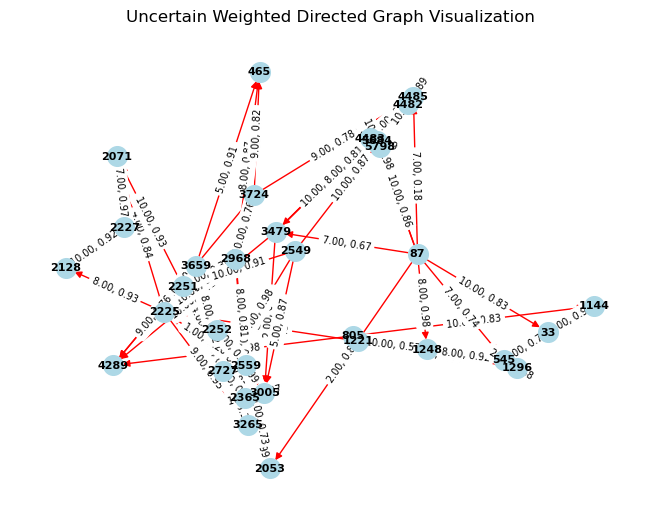

In [83]:
plot_graph_v2(ObsWikiVote06)

In [46]:
beta = 0.1

ObsWikiVote01 = greedy_average_surplus_degree(G,beta)
# Lấy các giá trị xác suất từ các cạnh
probabilities = [ObsWikiVote01[u][v]['probability'] for u, v in ObsWikiVote01.edges()]
weights = [ObsWikiVote01[u][v]['weight'] for u, v in ObsWikiVote01.edges()]

# Tính giá trị trung bình
mean_probability = np.mean(probabilities)
mean_weight = np.mean(weights)

# Tính độ lệch chuẩn
std_deviation = np.std(probabilities)
print("Mật độ kì vọng của đồ thị con do thuật toán obs sinh ra là:", expected_density(ObsWikiVote01))
print("Số đỉnh trong đồ thị con của thuật toán obs  là:", ObsWikiVote01.number_of_nodes())
print("Số cạnh trong đồ thị con của thuật toán obs  là:", ObsWikiVote01.number_of_edges())
print("Mật độ kì cạnh vọng của thuật toán obs  là:",calculate_edge_density(ObsWikiVote01))
print("Xác xuất cạnh trung bình của thuật toán obs là:",average_edge_probability(ObsWikiVote01))
print(" trọng số cạnh trung bình của thuật toán obs là:",mean_weight)
print("Độ lệch chuẩn của thuật toán obs:", std_deviation)


100%|██████████████████████████████████████████████████████████████████████████████| 7113/7113 [43:11<00:00,  2.74it/s]


Mật độ kì vọng của đồ thị con do thuật toán obs sinh ra là: 24.55960832530815
Số đỉnh trong đồ thị con của thuật toán obs  là: 762
Số cạnh trong đồ thị con của thuật toán obs  là: 37085
sum_probabilities 18714.42154388481
num_possible_edges 579882
Mật độ kì cạnh vọng của thuật toán obs  là: 0.03227280988870979
Xác xuất cạnh trung bình của thuật toán obs là: 0.5046358782225917
 trọng số cạnh trung bình của thuật toán obs là: 5.546797896723743
Độ lệch chuẩn của thuật toán obs: 0.28911587760930796


In [ ]:
nx.write_gexf(ObsWikiVote01, "ObsWikiVote01.gexf")


In [4]:
beta = 0.2
ObsWikiVote02 = greedy_average_surplus_degree(G,beta)
# Lấy các giá trị xác suất từ các cạnh
probabilities = [ObsWikiVote02[u][v]['probability'] for u, v in ObsWikiVote02.edges()]
weights = [ObsWikiVote02[u][v]['weight'] for u, v in ObsWikiVote02.edges()]

# Tính giá trị trung bình
mean_probability = np.mean(probabilities)
mean_weight = np.mean(weights)

# Tính độ lệch chuẩn
std_deviation = np.std(probabilities)
print("Mật độ kì vọng của đồ thị con do thuật toán obs sinh ra là:", expected_density(ObsWikiVote02))
print("Số đỉnh trong đồ thị con của thuật toán obs  là:", ObsWikiVote02.number_of_nodes())
print("Số cạnh trong đồ thị con của thuật toán obs  là:", ObsWikiVote02.number_of_edges())
print("Mật độ kì cạnh vọng của thuật toán obs  là:",calculate_edge_density(ObsWikiVote02))
print("Xác xuất cạnh trung bình của thuật toán obs là:",average_edge_probability(ObsWikiVote02))
print(" trọng số cạnh trung bình của thuật toán obs là:",mean_weight)
print("Độ lệch chuẩn của thuật toán obs:", std_deviation)

100%|██████████████████████████████████████████████████████████████████████████████| 7113/7113 [50:05<00:00,  2.37it/s]


Mật độ kì vọng của đồ thị con do thuật toán obs sinh ra là: 24.46116175592696
Số đỉnh trong đồ thị con của thuật toán obs  là: 766
Số cạnh trong đồ thị con của thuật toán obs  là: 37028
sum_probabilities 18737.24990504005
num_possible_edges 585990
Mật độ kì cạnh vọng của thuật toán obs  là: 0.03197537484434897
Xác xuất cạnh trung bình của thuật toán obs là: 0.5060292185654114
 trọng số cạnh trung bình của thuật toán obs là: 0.5033128510313922
Độ lệch chuẩn của thuật toán obs: 0.28997723214426296


In [5]:
beta = 0.4

ObsWikiVote04 = greedy_average_surplus_degree(G,beta)
# Lấy các giá trị xác suất từ các cạnh
probabilities = [ObsWikiVote04[u][v]['probability'] for u, v in ObsWikiVote04.edges()]
weights = [ObsWikiVote04[u][v]['weight'] for u, v in ObsWikiVote04.edges()]

# Tính giá trị trung bình
mean_probability = np.mean(probabilities)
mean_weight = np.mean(weights)

# Tính độ lệch chuẩn
std_deviation = np.std(probabilities)
print("Mật độ kì vọng của đồ thị con do thuật toán obs sinh ra là:", expected_density(ObsWikiVote04))
print("Số đỉnh trong đồ thị con của thuật toán obs  là:", ObsWikiVote04.number_of_nodes())
print("Số cạnh trong đồ thị con của thuật toán obs  là:", ObsWikiVote04.number_of_edges())
print("Mật độ kì cạnh vọng của thuật toán obs  là:",calculate_edge_density(ObsWikiVote04))
print("Xác xuất cạnh trung bình của thuật toán obs là:",average_edge_probability(ObsWikiVote04))
print(" trọng số cạnh trung bình của thuật toán obs là:",mean_weight)
print("Độ lệch chuẩn của thuật toán obs:", std_deviation)


100%|██████████████████████████████████████████████████████████████████████████████| 7113/7113 [45:11<00:00,  2.62it/s]


Mật độ kì vọng của đồ thị con do thuật toán obs sinh ra là: 22.385075464632674
Số đỉnh trong đồ thị con của thuật toán obs  là: 614
Số cạnh trong đồ thị con của thuật toán obs  là: 26320
sum_probabilities 13744.436335284463
num_possible_edges 376382
Mật độ kì cạnh vọng của thuật toán obs  là: 0.03651725198145624
Xác xuất cạnh trung bình của thuật toán obs là: 0.5222050279363398
 trọng số cạnh trung bình của thuật toán obs là: 0.5024641921060727
Độ lệch chuẩn của thuật toán obs: 0.289342031481842


In [6]:
beta = 0.6

ObsWikiVote06 = greedy_average_surplus_degree(G,beta)
# Lấy các giá trị xác suất từ các cạnh
probabilities = [ObsWikiVote06[u][v]['probability'] for u, v in ObsWikiVote06.edges()]
weights = [ObsWikiVote06[u][v]['weight'] for u, v in ObsWikiVote06.edges()]

# Tính giá trị trung bình
mean_probability = np.mean(probabilities)
mean_weight = np.mean(weights)

# Tính độ lệch chuẩn
std_deviation = np.std(probabilities)
print("Mật độ kì vọng của đồ thị con do thuật toán obs sinh ra là:", expected_density(ObsWikiVote06))
print("Số đỉnh trong đồ thị con của thuật toán obs  là:", ObsWikiVote06.number_of_nodes())
print("Số cạnh trong đồ thị con của thuật toán obs  là:", ObsWikiVote06.number_of_edges())
print("Mật độ kì cạnh vọng của thuật toán obs  là:",calculate_edge_density(ObsWikiVote06))
print("Xác xuất cạnh trung bình của thuật toán obs là:",average_edge_probability(ObsWikiVote06))
print(" trọng số cạnh trung bình của thuật toán obs là:",mean_weight)
print("Độ lệch chuẩn của thuật toán obs:", std_deviation)


 22%|█████████████████                                                             | 1557/7113 [04:48<17:10,  5.39it/s]


KeyboardInterrupt: 

In [7]:
beta = 0.8

ObsWikiVote08 = greedy_average_surplus_degree(G,beta)
# Lấy các giá trị xác suất từ các cạnh
probabilities = [ObsWikiVote08[u][v]['probability'] for u, v in ObsWikiVote08.edges()]
weights = [ObsWikiVote08[u][v]['weight'] for u, v in ObsWikiVote08.edges()]

# Tính giá trị trung bình
mean_probability = np.mean(probabilities)
mean_weight = np.mean(weights)

# Tính độ lệch chuẩn
std_deviation = np.std(probabilities)
print("Mật độ kì vọng của đồ thị con do thuật toán obs sinh ra là:", expected_density(ObsWikiVote08))
print("Số đỉnh trong đồ thị con của thuật toán obs  là:", ObsWikiVote08.number_of_nodes())
print("Số cạnh trong đồ thị con của thuật toán obs  là:", ObsWikiVote08.number_of_edges())
print("Mật độ kì cạnh vọng của thuật toán obs  là:",calculate_edge_density(ObsWikiVote08))
print("Xác xuất cạnh trung bình của thuật toán obs là:",average_edge_probability(ObsWikiVote08))
print(" trọng số cạnh trung bình của thuật toán obs là:",mean_weight)
print("Độ lệch chuẩn của thuật toán obs:", std_deviation)


100%|██████████████████████████████████████████████████████████████████████████████| 7113/7113 [07:28<00:00, 15.87it/s]

Mật độ kì vọng của đồ thị con do thuật toán obs sinh ra là: 0.576373392914729
Số đỉnh trong đồ thị con của thuật toán obs  là: 32
Số cạnh trong đồ thị con của thuật toán obs  là: 19
sum_probabilities 18.443948573271328
num_possible_edges 992
Mật độ kì cạnh vọng của thuật toán obs  là: 0.018592690094023517
Xác xuất cạnh trung bình của thuật toán obs là: 0.970734135435333
 trọng số cạnh trung bình của thuật toán obs là: 0.8766310236385282
Độ lệch chuẩn của thuật toán obs: 0.026186013558480437


In [89]:
nx.write_gexf(ObsWikiVote02, "ObsWikiVote02.gexf")
nx.write_gexf(ObsWikiVote04, "ObsWikiVote04.gexf")
nx.write_gexf(ObsWikiVote08, "ObsWikiVote08.gexf")


# Đối với đồ thị p2p-Gnutella08

In [66]:
random.seed(1)
# Initialize a directed graph
G = nx.DiGraph()

# Assuming your data is stored in a file called 'email-Eu-core.txt'
# and the data starts from a specific line after the header.
# Adjust the path to where you have stored your file.
with open('p2p-Gnutella08.txt', 'r') as file:
    for line in file:
        # Skip header lines or process them differently if needed
        if line.startswith('#'):
            continue
        
        # Split the line into source and target nodes
        source, target = map(int, line.split())
        # Assign a random probability to each edge
        probability = random.random()  # Generate a random probability between 0 and 1
        # Assign a random weight to each edge (for example, between 1 and 10)
        weight = random.random()
        G.add_edge(source, target, probability=probability, weight=weight)

print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())




# Optional: Print some edges with their attributes to verify
# for u, v, data in G.edges(data=True):
#     print(f"Edge ({u}, {v}) - Probability: {data['probability']}, Weight: {data['weight']}")


# Lấy các giá trị xác suất từ các cạnh
probabilities = [G[u][v]['probability'] for u, v in G.edges()]
weights = [G[u][v]['weight'] for u, v in G.edges()]
# Tính giá trị trung bình
mean_probability = np.mean(probabilities)
mean_weight = np.mean(weights)


# Tính độ lệch chuẩn
std_deviation = np.std(probabilities)

    
print("Giá trị cạnh trung bình của đồ thị protein579138:", mean_probability)
print("Độ lệch chuẩn của của  đồ thị protein579138:", std_deviation)
print("Trọng số cạnh trung bình của đồ thị là:",mean_weight)





Number of nodes: 6301
Number of edges: 20777
Giá trị cạnh trung bình của đồ thị protein579138: 0.5004933345397413
Độ lệch chuẩn của của  đồ thị protein579138: 0.2896557323372045
Trọng số cạnh trung bình của đồ thị là: 0.4994369331921513


In [67]:
beta = 0.6

p2pGnutella06 = greedy_average_surplus_degree(G,beta)
# Lấy các giá trị xác suất từ các cạnh
probabilities = [p2pGnutella06[u][v]['probability'] for u, v in p2pGnutella06.edges()]
weights = [p2pGnutella06[u][v]['weight'] for u, v in p2pGnutella06.edges()]

# Tính giá trị trung bình
mean_probability = np.mean(probabilities)
mean_weight = np.mean(weights)

# Tính độ lệch chuẩn
std_deviation = np.std(probabilities)
print("Mật độ kì vọng của đồ thị con do thuật toán obs sinh ra là:", expected_density(p2pGnutella06))
print("Số đỉnh trong đồ thị con của thuật toán obs  là:", p2pGnutella06.number_of_nodes())
print("Số cạnh trong đồ thị con của thuật toán obs  là:", p2pGnutella06.number_of_edges())
print("Mật độ kì cạnh vọng của thuật toán obs  là:",calculate_edge_density(p2pGnutella06))
print("Xác xuất cạnh trung bình của thuật toán obs là:",average_edge_probability(p2pGnutella06))
print(" trọng số cạnh trung bình của thuật toán obs là:",mean_weight)
print("Độ lệch chuẩn của thuật toán obs:", std_deviation)


100%|██████████████████████████████████████████████████████████████████████████████| 6299/6299 [06:47<00:00, 15.47it/s]

Mật độ kì vọng của đồ thị con do thuật toán obs sinh ra là: 0.927036378249573
Số đỉnh trong đồ thị con của thuật toán obs  là: 4
Số cạnh trong đồ thị con của thuật toán obs  là: 4
sum_probabilities 3.708145512998292
num_possible_edges 12
Mật độ kì cạnh vọng của thuật toán obs  là: 0.309012126083191
Xác xuất cạnh trung bình của thuật toán obs là: 0.927036378249573
 trọng số cạnh trung bình của thuật toán obs là: 0.678131428379578
Độ lệch chuẩn của thuật toán obs: 0.055061133437259706


In [ ]:
beta = 0.1

p2pGnutella08 = greedy_average_surplus_degree(G,beta)
# Lấy các giá trị xác suất từ các cạnh
probabilities = [p2pGnutella08[u][v]['probability'] for u, v in p2pGnutella08.edges()]
weights = [p2pGnutella08[u][v]['weight'] for u, v in p2pGnutella08.edges()]

# Tính giá trị trung bình
mean_probability = np.mean(probabilities)
mean_weight = np.mean(weights)

# Tính độ lệch chuẩn
std_deviation = np.std(probabilities)
print("Mật độ kì vọng của đồ thị con do thuật toán obs sinh ra là:", expected_density(p2pGnutella08))
print("Số đỉnh trong đồ thị con của thuật toán obs  là:", p2pGnutella08.number_of_nodes())
print("Số cạnh trong đồ thị con của thuật toán obs  là:", p2pGnutella08.number_of_edges())
print("Mật độ kì cạnh vọng của thuật toán obs  là:",calculate_edge_density(p2pGnutella08))
print("Xác xuất cạnh trung bình của thuật toán obs là:",average_edge_probability(p2pGnutella08))
print(" trọng số cạnh trung bình của thuật toán obs là:",mean_weight)
print("Độ lệch chuẩn của thuật toán obs:", std_deviation)


 75%|██████████████████████████████████████████████████████████▎                   | 4710/6299 [11:40<01:19, 20.04it/s]

In [ ]:
beta = 0.4

p2pGnutella04 = greedy_average_surplus_degree(G,beta)
# Lấy các giá trị xác suất từ các cạnh
probabilities = [p2pGnutella04[u][v]['probability'] for u, v in p2pGnutella04.edges()]
weights = [p2pGnutella04[u][v]['weight'] for u, v in p2pGnutella04.edges()]

# Tính giá trị trung bình
mean_probability = np.mean(probabilities)
mean_weight = np.mean(weights)

# Tính độ lệch chuẩn
std_deviation = np.std(probabilities)
print("Mật độ kì vọng của đồ thị con do thuật toán obs sinh ra là:", expected_density(p2pGnutella04))
print("Số đỉnh trong đồ thị con của thuật toán obs  là:", p2pGnutella04.number_of_nodes())
print("Số cạnh trong đồ thị con của thuật toán obs  là:", p2pGnutella04.number_of_edges())
print("Mật độ kì cạnh vọng của thuật toán obs  là:",calculate_edge_density(p2pGnutella04))
print("Xác xuất cạnh trung bình của thuật toán obs là:",average_edge_probability(p2pGnutella04))
print(" trọng số cạnh trung bình của thuật toán obs là:",mean_weight)
print("Độ lệch chuẩn của thuật toán obs:", std_deviation)


In [ ]:
beta = 0.8

p2pGnutella08 = greedy_average_surplus_degree(G,beta)
# Lấy các giá trị xác suất từ các cạnh
probabilities = [p2pGnutella08[u][v]['probability'] for u, v in p2pGnutella08.edges()]
weights = [p2pGnutella08[u][v]['weight'] for u, v in p2pGnutella08.edges()]

# Tính giá trị trung bình
mean_probability = np.mean(probabilities)
mean_weight = np.mean(weights)

# Tính độ lệch chuẩn
std_deviation = np.std(probabilities)
print("Mật độ kì vọng của đồ thị con do thuật toán obs sinh ra là:", expected_density(p2pGnutella08))
print("Số đỉnh trong đồ thị con của thuật toán obs  là:", p2pGnutella08.number_of_nodes())
print("Số cạnh trong đồ thị con của thuật toán obs  là:", p2pGnutella08.number_of_edges())
print("Mật độ kì cạnh vọng của thuật toán obs  là:",calculate_edge_density(p2pGnutella08))
print("Xác xuất cạnh trung bình của thuật toán obs là:",average_edge_probability(p2pGnutella08))
print(" trọng số cạnh trung bình của thuật toán obs là:",mean_weight)
print("Độ lệch chuẩn của thuật toán obs:", std_deviation)


# Đồ thị 579138.protein

In [38]:
random.seed(9)

# Đọc dữ liệu từ tệp TXT
file_path = '579138.protein.links.full.v12.0.txt/579138.protein.links.full.v12.0.txt'
data = pd.read_csv(file_path, sep=' ')

# Khởi tạo đồ thị có hướng
G = nx.DiGraph()

# Thêm các cạnh với trọng số và xác suất
for _, row in data.iterrows():
    protein1 = row['protein1']
    protein2 = row['protein2']
    combined_score = row['combined_score']
    
    # Giả sử xác suất được tính dựa trên combined_score
    probability = combined_score / 1000.0  # Điều chỉnh hệ số nếu cần thiết

     # Định hướng cạnh dựa trên một quy tắc ngẫu nhiên
    if random.choice([True, False]):
        G.add_edge(protein1, protein2, probability= random.random(), weight=random.random())
#     else:
#         G.add_edge(protein2, protein1, probability= probability, weight=random.randint(1, 10))

# # Hàm vẽ đồ thị
# def plot_graph(G):
#     pos = nx.spring_layout(G)  # Tạo bố cục cho đồ thị

#     # Lấy thuộc tính xác suất và trọng số của các cạnh
#     edge_probabilities = nx.get_edge_attributes(G, 'probability')
#     edge_weights = nx.get_edge_attributes(G, 'weight')

#     # Kết hợp xác suất và trọng số vào nhãn cạnh
#     edge_labels = {edge: f"{edge_weights[edge]:.2f}, {edge_probabilities[edge]:.2f}" for edge in G.edges()}

#     # Vẽ đồ thị
#     nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='red', node_size=500, font_size=8, font_weight='bold')
#     nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=7)  # Hiển thị nhãn của các cạnh

#     plt.title('Uncertain Weighted Directed Graph Visualization')
#     plt.show()

# # Gọi hàm để vẽ đồ thị
# plot_graph(G)

# # In các cạnh của đồ thị có hướng
# print("Edges in directed graph:")
# for edge in G.edges(data=True):
#     print(edge)
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

Number of nodes: 1670
Number of edges: 107004


In [39]:

# Lấy các giá trị xác suất từ các cạnh
probabilities = [G[u][v]['probability'] for u, v in G.edges()]
weights = [G[u][v]['weight'] for u, v in G.edges()]
# Tính giá trị trung bình
mean_probability = np.mean(probabilities)
mean_weight = np.mean(weights)


# Tính độ lệch chuẩn
std_deviation = np.std(probabilities)
do_lech_chuan_trong_so = np.std(weights)

    
print("Giá trị cạnh trung bình của đồ thị protein579138:", mean_probability)
print("Độ lệch chuẩn của của  đồ thị protein579138:", std_deviation)
print("Độ lệch chuẩn trọng số của đồ thị con được tạo ra bởi thuật toán uds là:", do_lech_chuan_trong_so)
print("Trọng số cạnh trung bình của đồ thị là:",mean_weight)




Giá trị cạnh trung bình của đồ thị protein579138: 0.4985795479840073
Độ lệch chuẩn của của  đồ thị protein579138: 0.287876919175875
Độ lệch chuẩn trọng số của đồ thị con được tạo ra bởi thuật toán uds là: 0.28811512642741666
Trọng số cạnh trung bình của đồ thị là: 0.5009674545466816


In [40]:
beta = 0.1

Obs579138Protein01 = greedy_average_surplus_degree(G,beta)
# Lấy các giá trị xác suất từ các cạnh
probabilities = [Obs579138Protein01[u][v]['probability'] for u, v in Obs579138Protein01.edges()]
weights = [Obs579138Protein01[u][v]['weight'] for u, v in Obs579138Protein01.edges()]

# Tính giá trị trung bình
mean_probability = np.mean(probabilities)
mean_weight = np.mean(weights)

# Tính độ lệch chuẩn
std_deviation = np.std(probabilities)
print("Mật độ kì vọng của đồ thị con do thuật toán obs sinh ra là:", expected_density(Obs579138Protein01))
print("Số đỉnh trong đồ thị con của thuật toán obs  là:", Obs579138Protein01.number_of_nodes())
print("Số cạnh trong đồ thị con của thuật toán obs  là:", Obs579138Protein01.number_of_edges())
print("Mật độ kì cạnh vọng của thuật toán obs  là:",calculate_edge_density(Obs579138Protein01))
print("Xác xuất cạnh trung bình của thuật toán obs là:",average_edge_probability(Obs579138Protein01))
print(" trọng số cạnh trung bình của thuật toán obs là:",mean_weight)
print("Độ lệch chuẩn của thuật toán obs:", std_deviation)


100%|██████████████████████████████████████████████████████████████████████████████| 1668/1668 [06:47<00:00,  4.09it/s]


Mật độ kì vọng của đồ thị con do thuật toán obs sinh ra là: 41.351226434365635
Số đỉnh trong đồ thị con của thuật toán obs  là: 811
Số cạnh trong đồ thị con của thuật toán obs  là: 66922
sum_probabilities 33535.84463827053
num_possible_edges 656910
Mật độ kì cạnh vọng của thuật toán obs  là: 0.051050896832550166
Xác xuất cạnh trung bình của thuật toán obs là: 0.501118386155084
 trọng số cạnh trung bình của thuật toán obs là: 0.5021173431388396
Độ lệch chuẩn của thuật toán obs: 0.2883559779273041


In [41]:
beta = 0.2

Obs579138Protein02 = greedy_average_surplus_degree(G,beta)
# Lấy các giá trị xác suất từ các cạnh
probabilities = [Obs579138Protein02[u][v]['probability'] for u, v in Obs579138Protein02.edges()]
weights = [Obs579138Protein02[u][v]['weight'] for u, v in Obs579138Protein02.edges()]

# Tính giá trị trung bình
mean_probability = np.mean(probabilities)
mean_weight = np.mean(weights)

# Tính độ lệch chuẩn
std_deviation = np.std(probabilities)
print("Mật độ kì vọng của đồ thị con do thuật toán obs sinh ra là:", expected_density(Obs579138Protein02))
print("Số đỉnh trong đồ thị con của thuật toán obs  là:", Obs579138Protein02.number_of_nodes())
print("Số cạnh trong đồ thị con của thuật toán obs  là:", Obs579138Protein02.number_of_edges())
print("Mật độ kì cạnh vọng của thuật toán obs  là:",calculate_edge_density(Obs579138Protein02))
print("Xác xuất cạnh trung bình của thuật toán obs là:",average_edge_probability(Obs579138Protein02))
print(" trọng số cạnh trung bình của thuật toán obs là:",mean_weight)
print("Độ lệch chuẩn của thuật toán obs:", std_deviation)


100%|██████████████████████████████████████████████████████████████████████████████| 1668/1668 [05:26<00:00,  5.10it/s]


Mật độ kì vọng của đồ thị con do thuật toán obs sinh ra là: 41.28711640098163
Số đỉnh trong đồ thị con của thuật toán obs  là: 820
Số cạnh trong đồ thị con của thuật toán obs  là: 67510
sum_probabilities 33855.435448804936
num_possible_edges 671580
Mật độ kì cạnh vọng của thuật toán obs  là: 0.05041161953721811
Xác xuất cạnh trung bình của thuật toán obs là: 0.5014877121730845
 trọng số cạnh trung bình của thuật toán obs là: 0.5022381189438757
Độ lệch chuẩn của thuật toán obs: 0.28835907067705396


In [42]:
beta = 0.4

Obs579138Protein04 = greedy_average_surplus_degree(G,beta)
# Lấy các giá trị xác suất từ các cạnh
probabilities = [Obs579138Protein04[u][v]['probability'] for u, v in Obs579138Protein04.edges()]
weights = [Obs579138Protein04[u][v]['weight'] for u, v in Obs579138Protein04.edges()]

# Tính giá trị trung bình
mean_probability = np.mean(probabilities)
mean_weight = np.mean(weights)

# Tính độ lệch chuẩn
std_deviation = np.std(probabilities)
print("Mật độ kì vọng của đồ thị con do thuật toán obs sinh ra là:", expected_density(Obs579138Protein04))
print("Số đỉnh trong đồ thị con của thuật toán obs  là:", Obs579138Protein04.number_of_nodes())
print("Số cạnh trong đồ thị con của thuật toán obs  là:", Obs579138Protein04.number_of_edges())
print("Mật độ kì cạnh vọng của thuật toán obs  là:",calculate_edge_density(Obs579138Protein04))
print("Xác xuất cạnh trung bình của thuật toán obs là:",average_edge_probability(Obs579138Protein04))
print(" trọng số cạnh trung bình của thuật toán obs là:",mean_weight)
print("Độ lệch chuẩn của thuật toán obs:", std_deviation)


100%|██████████████████████████████████████████████████████████████████████████████| 1668/1668 [05:05<00:00,  5.46it/s]


Mật độ kì vọng của đồ thị con do thuật toán obs sinh ra là: 39.866268914200546
Số đỉnh trong đồ thị con của thuật toán obs  là: 785
Số cạnh trong đồ thị con của thuật toán obs  là: 61776
sum_probabilities 31295.021097647426
num_possible_edges 615440
Mật độ kì cạnh vọng của thuật toán obs  là: 0.05084983279872518
Xác xuất cạnh trung bình của thuật toán obs là: 0.5065886606068283
 trọng số cạnh trung bình của thuật toán obs là: 0.5025474884626338
Độ lệch chuẩn của thuật toán obs: 0.2882540483386092


In [43]:
beta = 0.6

Obs579138Protein06 = greedy_average_surplus_degree(G,beta)
# Lấy các giá trị xác suất từ các cạnh
probabilities = [Obs579138Protein06[u][v]['probability'] for u, v in Obs579138Protein06.edges()]
weights = [Obs579138Protein06[u][v]['weight'] for u, v in Obs579138Protein06.edges()]

# Tính giá trị trung bình
mean_probability = np.mean(probabilities)
mean_weight = np.mean(weights)

# Tính độ lệch chuẩn
std_deviation = np.std(probabilities)
print("Mật độ kì vọng của đồ thị con do thuật toán obs sinh ra là:", expected_density(Obs579138Protein06))
print("Số đỉnh trong đồ thị con của thuật toán obs  là:", Obs579138Protein06.number_of_nodes())
print("Số cạnh trong đồ thị con của thuật toán obs  là:", Obs579138Protein06.number_of_edges())
print("Mật độ kì cạnh vọng của thuật toán obs  là:",calculate_edge_density(Obs579138Protein06))
print("Xác xuất cạnh trung bình của thuật toán obs là:",average_edge_probability(Obs579138Protein06))
print(" trọng số cạnh trung bình của thuật toán obs là:",mean_weight)
print("Độ lệch chuẩn của thuật toán obs:", std_deviation)

100%|██████████████████████████████████████████████████████████████████████████████| 1668/1668 [02:28<00:00, 11.24it/s]


Mật độ kì vọng của đồ thị con do thuật toán obs sinh ra là: 3.2140225608400392
Số đỉnh trong đồ thị con của thuật toán obs  là: 79
Số cạnh trong đồ thị con của thuật toán obs  là: 346
sum_probabilities 253.9077823063631
num_possible_edges 6162
Mật độ kì cạnh vọng của thuật toán obs  là: 0.04120541744666717
Xác xuất cạnh trung bình của thuật toán obs là: 0.7338375211166563
 trọng số cạnh trung bình của thuật toán obs là: 0.602009907796066
Độ lệch chuẩn của thuật toán obs: 0.2230533953950396


In [44]:
beta = 0.8

Obs579138Protein08 = greedy_average_surplus_degree(G,beta)
# Lấy các giá trị xác suất từ các cạnh
probabilities = [Obs579138Protein08[u][v]['probability'] for u, v in Obs579138Protein08.edges()]
weights = [Obs579138Protein08[u][v]['weight'] for u, v in Obs579138Protein08.edges()]

# Tính giá trị trung bình
mean_probability = np.mean(probabilities)
mean_weight = np.mean(weights)

# Tính độ lệch chuẩn
std_deviation = np.std(probabilities)
print("Mật độ kì vọng của đồ thị con do thuật toán obs sinh ra là:", expected_density(Obs579138Protein08))
print("Số đỉnh trong đồ thị con của thuật toán obs  là:", Obs579138Protein08.number_of_nodes())
print("Số cạnh trong đồ thị con của thuật toán obs  là:", Obs579138Protein08.number_of_edges())
print("Mật độ kì cạnh vọng của thuật toán obs  là:",calculate_edge_density(Obs579138Protein08))
print("Xác xuất cạnh trung bình của thuật toán obs là:",average_edge_probability(Obs579138Protein08))
print(" trọng số cạnh trung bình của thuật toán obs là:",mean_weight)
print("Độ lệch chuẩn của thuật toán obs:", std_deviation)


100%|██████████████████████████████████████████████████████████████████████████████| 1668/1668 [02:13<00:00, 12.52it/s]

Mật độ kì vọng của đồ thị con do thuật toán obs sinh ra là: 0.9806890668278485
Số đỉnh trong đồ thị con của thuật toán obs  là: 2
Số cạnh trong đồ thị con của thuật toán obs  là: 2
sum_probabilities 1.961378133655697
num_possible_edges 2
Mật độ kì cạnh vọng của thuật toán obs  là: 0.9806890668278485
Xác xuất cạnh trung bình của thuật toán obs là: 0.9806890668278485
 trọng số cạnh trung bình của thuật toán obs là: 0.6524858577913011
Độ lệch chuẩn của thuật toán obs: 0.0034935599831801833


# thử với trọng số từ 0 tói 1 


In [33]:
random.seed(9)

# Đọc dữ liệu từ tệp TXT
file_path = '579138.protein.links.full.v12.0.txt/579138.protein.links.full.v12.0.txt'
data = pd.read_csv(file_path, sep=' ')

# Khởi tạo đồ thị có hướng
G = nx.DiGraph()

# Thêm các cạnh với trọng số và xác suất
for _, row in data.iterrows():
    protein1 = row['protein1']
    protein2 = row['protein2']
    combined_score = row['combined_score']
    
    # Giả sử xác suất được tính dựa trên combined_score
    probability = combined_score / 1000.0  # Điều chỉnh hệ số nếu cần thiết

     # Định hướng cạnh dựa trên một quy tắc ngẫu nhiên
    if random.choice([True, False]):
        G.add_edge(protein1, protein2, probability= random.random(), weight=random.random())
#     else:
#         G.add_edge(protein2, protein1, probability= random.random(), weight=random.random())

# # Hàm vẽ đồ thị
# def plot_graph(G):
#     pos = nx.spring_layout(G)  # Tạo bố cục cho đồ thị

#     # Lấy thuộc tính xác suất và trọng số của các cạnh
#     edge_probabilities = nx.get_edge_attributes(G, 'probability')
#     edge_weights = nx.get_edge_attributes(G, 'weight')

#     # Kết hợp xác suất và trọng số vào nhãn cạnh
#     edge_labels = {edge: f"{edge_weights[edge]:.2f}, {edge_probabilities[edge]:.2f}" for edge in G.edges()}

#     # Vẽ đồ thị
#     nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='red', node_size=500, font_size=8, font_weight='bold')
#     nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=7)  # Hiển thị nhãn của các cạnh

#     plt.title('Uncertain Weighted Directed Graph Visualization')
#     plt.show()

# # Gọi hàm để vẽ đồ thị
# plot_graph(G)

# # In các cạnh của đồ thị có hướng
# print("Edges in directed graph:")
# for edge in G.edges(data=True):
#     print(edge)
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())


# Lấy các giá trị xác suất từ các cạnh
probabilities = [G[u][v]['probability'] for u, v in G.edges()]
weights = [G[u][v]['weight'] for u, v in G.edges()]
# Tính giá trị trung bình
mean_probability = np.mean(probabilities)
mean_weight = np.mean(weights)


# Tính độ lệch chuẩn
std_deviation = np.std(probabilities)
do_lech_chuan_trong_so = np.std(weights)

    
print("Giá trị cạnh trung bình của đồ thị protein579138:", mean_probability)
print("Độ lệch chuẩn của của  đồ thị protein579138:", std_deviation)
print("Độ lệch chuẩn trọng số của đồ thị con được tạo ra bởi thuật toán uds là:", do_lech_chuan_trong_so)
print("Trọng số cạnh trung bình của đồ thị là:",mean_weight)




Number of nodes: 1670
Number of edges: 107004
Giá trị cạnh trung bình của đồ thị protein579138: 0.4985795479840073
Độ lệch chuẩn của của  đồ thị protein579138: 0.287876919175875
Độ lệch chuẩn trọng số của đồ thị con được tạo ra bởi thuật toán uds là: 0.28811512642741666
Trọng số cạnh trung bình của đồ thị là: 0.5009674545466816


In [34]:
beta = 0.6

Obs579138Protein06 = greedy_average_surplus_degree(G,beta)
# Lấy các giá trị xác suất từ các cạnh
probabilities = [Obs579138Protein06[u][v]['probability'] for u, v in Obs579138Protein06.edges()]
weights = [Obs579138Protein06[u][v]['weight'] for u, v in Obs579138Protein06.edges()]

# Tính giá trị trung bình
mean_probability = np.mean(probabilities)
mean_weight = np.mean(weights)

# Tính độ lệch chuẩn
std_deviation = np.std(probabilities)
print("Mật độ kì vọng của đồ thị con do thuật toán obs sinh ra là:", expected_density(Obs579138Protein06))
print("Số đỉnh trong đồ thị con của thuật toán obs  là:", Obs579138Protein06.number_of_nodes())
print("Số cạnh trong đồ thị con của thuật toán obs  là:", Obs579138Protein06.number_of_edges())
print("Mật độ kì cạnh vọng của thuật toán obs  là:",calculate_edge_density_v3(Obs579138Protein06))
print("Xác xuất cạnh trung bình của thuật toán obs là:",average_edge_probability(Obs579138Protein06))
print(" trọng số cạnh trung bình của thuật toán obs là:",mean_weight)
print("Độ lệch chuẩn của thuật toán obs:", std_deviation)

100%|██████████████████████████████████████████████████████████████████████████████| 1668/1668 [04:53<00:00,  5.68it/s]


Mật độ kì vọng của đồ thị con do thuật toán obs sinh ra là: 3.581004305283248
Số đỉnh trong đồ thị con của thuật toán obs  là: 107
Số cạnh trong đồ thị con của thuật toán obs  là: 536
Mật độ kì cạnh vọng của thuật toán obs  là: 0.020172748573099034
Xác xuất cạnh trung bình của thuật toán obs là: 0.7148646654203499
 trọng số cạnh trung bình của thuật toán obs là: 0.5627480439360995
Độ lệch chuẩn của thuật toán obs: 0.24025177791080216


In [12]:
nx.write_gexf(Obs579138Protein01, "Obs579138Protein01.gexf")
nx.write_gexf(Obs579138Protein02, "Obs579138Protein02.gexf")
nx.write_gexf(Obs579138Protein04, "Obs579138Protein04.gexf")
nx.write_gexf(Obs579138Protein06, "Obs579138Protein06.gexf")
nx.write_gexf(Obs579138Protein08, "Obs579138Protein08.gexf")


In [29]:
# # Đọc đồ thị từ tập tin GEXF
# G_OBS = nx.read_gexf("protein579138_obs_06.gexf")
G_OBS = Obs579138Protein08
# Bây giờ bạn có thể làm việc với đồ thị G
# Ví dụ: In ra số lượng đỉnh và cạnh
print("Số lượng đỉnh:", G_OBS.number_of_nodes())
print("Số lượng cạnh:", G_OBS.number_of_edges())





Số lượng đỉnh: 62
Số lượng cạnh: 2849


In [30]:
G_UDS = nx.read_gexf("uds_579138_protein.gexf")

# Bây giờ bạn có thể làm việc với đồ thị G
# Ví dụ: In ra số lượng đỉnh và cạnh
print("Số lượng đỉnh:", G_UDS.number_of_nodes())
print("Số lượng cạnh:", G_UDS.number_of_edges())



Số lượng đỉnh: 90
Số lượng cạnh: 5461


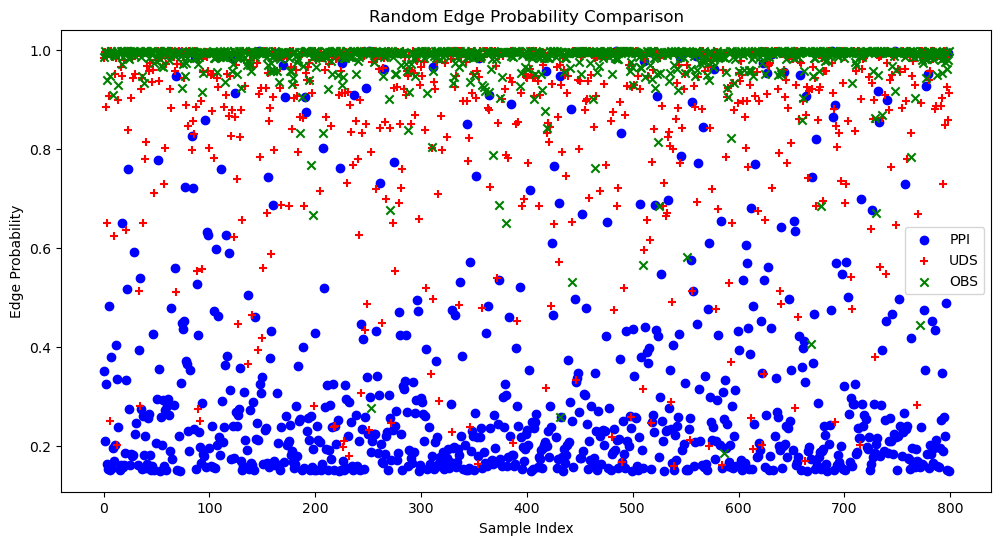

In [32]:
G_PPI = G
    
def sample_edges(G, num_samples):
    edges_list = list(G.edges(data=True))  # Chuyển đổi sang danh sách
    if len(edges_list) < num_samples:
        return edges_list
    else:
        return random.sample(edges_list, num_samples)  # Lấy mẫu ngẫu nhiên từ danh sách


# Lấy mẫu cạnh
ppi_sample = sample_edges(G_PPI, 800)
uds_sample = sample_edges(G_UDS, 800)
obs_sample = sample_edges(G_OBS, 800)


def extract_probabilities(edge_samples):
    indices = list(range(len(edge_samples)))
    probabilities = [data['probability'] for _, _, data in edge_samples]
    return indices, probabilities

ppi_indices, ppi_probs = extract_probabilities(ppi_sample)
uds_indices, uds_probs = extract_probabilities(uds_sample)
obs_indices, obs_probs = extract_probabilities(obs_sample)
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.scatter(ppi_indices, ppi_probs, color='blue', marker='o', label='PPI')
plt.scatter(uds_indices, uds_probs, color='red', marker='+', label='UDS')
plt.scatter(obs_indices, obs_probs, color='green', marker='x', label='OBS')

plt.title('Random Edge Probability Comparison')
plt.xlabel('Sample Index')
plt.ylabel('Edge Probability')
plt.legend()
plt.show()


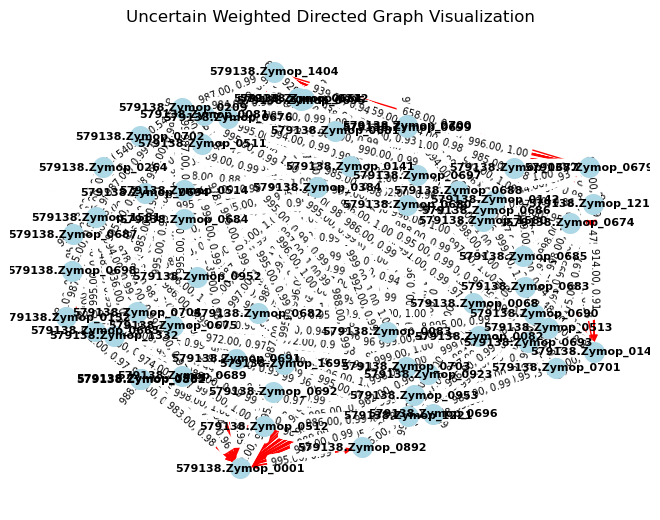

In [33]:
plot_graph_v2(Obs579138Protein08)